In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

#Import Primary Modules:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from PIL import Image # converting images into arrays

#install seaborn and wordcloud
!pip install seaborn wordcloud 

#import seaborn
import seaborn as sns

#import wordcloud
import wordcloud


In [3]:
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

In [5]:
df_can

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
192,Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,...,161,140,122,133,128,211,160,174,217,2985
193,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,...,91,77,71,64,60,102,69,46,59,1677


In [9]:
df_can.shape

(195, 39)

In [11]:
df_can.set_index('Country', inplace=True) 

In [17]:
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'] , : ]

df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


# Waffle Charts for Nerds

In [25]:
total_values = df_dsn["Total"].sum()
category_proportions = df_dsn["Total"]/total_values
category_proportions 

Country
Denmark    0.322557
Norway     0.192409
Sweden     0.485034
Name: Total, dtype: float64

In [29]:
pd.DataFrame({"Category Proportions" : category_proportions})

,Category Proportions
Country,
Denmark,0.322557
Norway,0.192409
Sweden,0.485034


## Defining the Waffle Chart

In [38]:
width = 40 
height = 10 
total_sum_tiles = 40 * 10 

In [40]:
tiles_per_category = (category_proportions * total_sum_tiles).round().astype(int)

pd.DataFrame({"Number of Tiles" : tiles_per_category})

,Number of Tiles
Country,
Denmark,129
Norway,77
Sweden,194


In [42]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width), dtype = np.uint)

# define indices to loop through waffle chart
category_index = 0
tile_index = 0


for col in range(width):
    for row in range(height):
        tile_index += 1

        
        if tile_index > sum(tiles_per_category[0:category_index]):
    
            category_index += 1       
            
        waffle_chart[row, col] = category_index

In [46]:
waffle_chart  ### senin allahın yok oe 

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

<Figure size 640x480 with 0 Axes>

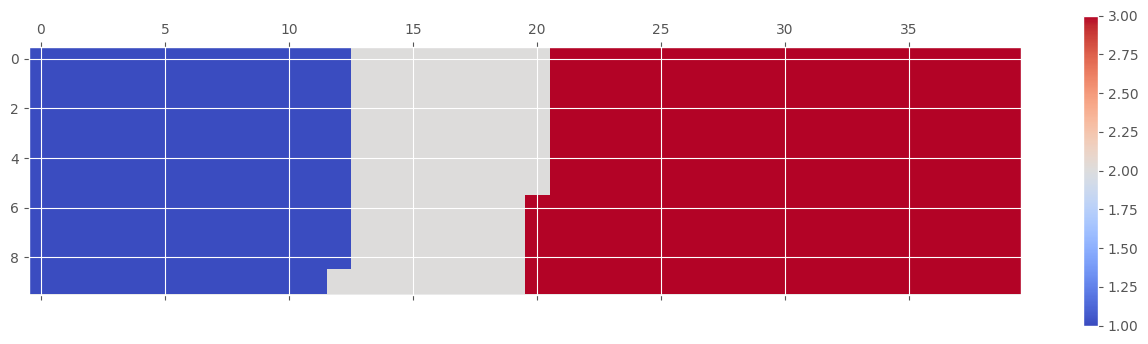

In [52]:
fig = plt.figure()


colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
plt.show()

<Figure size 640x480 with 0 Axes>

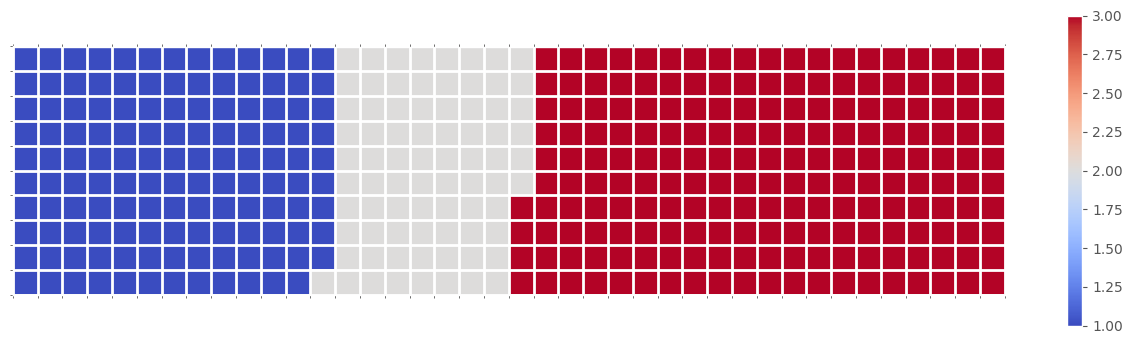

In [54]:
# instantiate a new figure object
fig = plt.figure()


colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()


ax = plt.gca()


ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    

ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])
plt.show()

# Waffle Chart to Humans

In [67]:
!pip install pywaffle

   ---------------------------------------- 0.0/25.6 MB ? eta -:--:--
   ---------------------------------------- 0.3/25.6 MB ? eta -:--:--
   -- ------------------------------------- 1.3/25.6 MB 4.8 MB/s eta 0:00:06
   -- ------------------------------------- 1.8/25.6 MB 3.9 MB/s eta 0:00:07
   ---- ----------------------------------- 2.6/25.6 MB 3.7 MB/s eta 0:00:07
   ----- ---------------------------------- 3.4/25.6 MB 3.7 MB/s eta 0:00:06
   ----- ---------------------------------- 3.7/25.6 MB 3.3 MB/s eta 0:00:07
   ------ --------------------------------- 4.5/25.6 MB 3.4 MB/s eta 0:00:07
   -------- ------------------------------- 5.2/25.6 MB 3.5 MB/s eta 0:00:06
   -------- ------------------------------- 5.8/25.6 MB 3.4 MB/s eta 0:00:06
   ---------- ----------------------------- 6.6/25.6 MB 3.4 MB/s eta 0:00:06
   ----------- ---------------------------- 7.1/25.6 MB 3.3 MB/s eta 0:00:06
   ----------- ---------------------------- 7.6/25.6 MB 3.3 MB/s eta 0:00:06
   ----------

In [69]:
#import Waffle from pywaffle
from pywaffle import Waffle

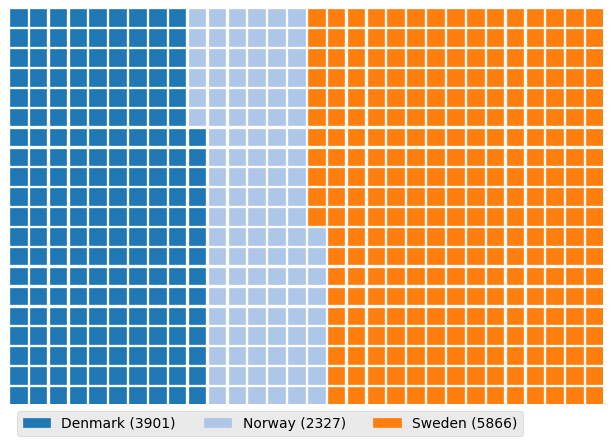

In [71]:
fig = plt.figure(FigureClass = Waffle,
                 rows = 20, columns = 30, #pass the number of rows and columns for the waffle 
                 values = df_dsn['Total'], #pass the data to be used for display
                 cmap_name = 'tab20', #color scheme
                 legend = {'labels': [f"{k} ({v})" for k, v in zip(df_dsn.index.values,df_dsn.Total)],
                            'loc': 'lower left', 'bbox_to_anchor':(0,-0.1),'ncol': 3}
                )

#Display the waffle chart
plt.show()

# Seaborn 

In [80]:
import seaborn as sns

In [82]:
df_can['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania',
       'Latin America and the Caribbean', 'Northern America'],
      dtype=object)

<Axes: xlabel='Continent', ylabel='count'>

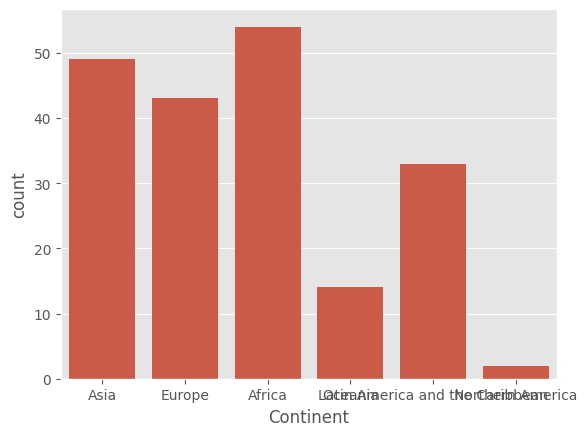

In [85]:
sns.countplot(x = "Continent" , data = df_can)

In [87]:
df_can1 = df_can.replace('Latin America and the Caribbean', 'L-America')
df_can1 = df_can1.replace('Northern America', 'N-America')

<Axes: xlabel='Continent', ylabel='count'>

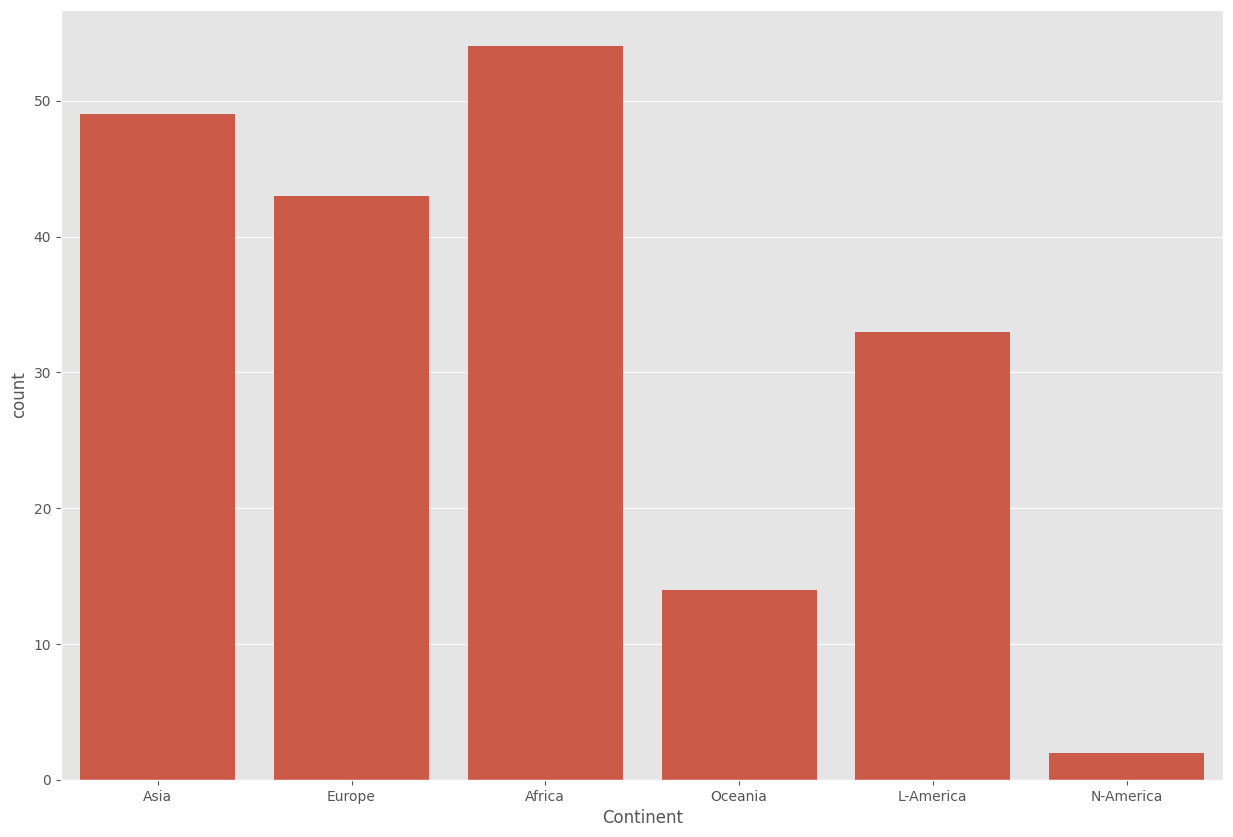

In [93]:
plt.figure(figsize = (15,10))
sns.countplot(x = "Continent" , data = df_can1)

<Axes: xlabel='Continent', ylabel='Total'>

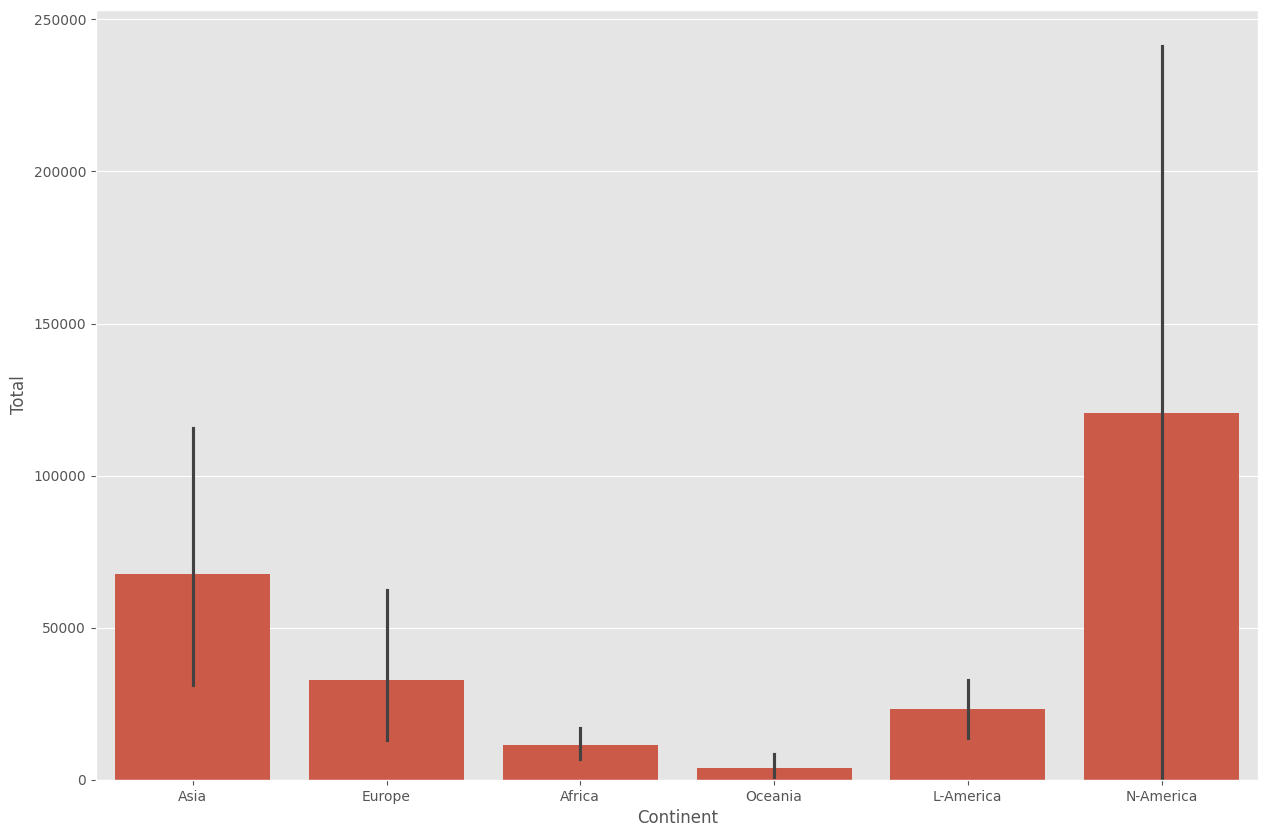

In [97]:
plt.figure(figsize = (15,10))
sns.barplot(x = "Continent" , y = "Total" , data = df_can1)

In [101]:
df_can2 = df_can1.groupby("Continent")["Total"].mean()
df_can2

Continent
Africa        11462.000000
Asia          67710.081633
Europe        32812.720930
L-America     23186.303030
N-America    120571.000000
Oceania        3941.000000
Name: Total, dtype: float64

In [111]:
years = list(map(str , range(1980,2013)))

In [115]:
df_tot = pd.DataFrame(df_can[years].sum(axis = 0))
df_tot.index = map(float , df_tot.index)

In [117]:
df_tot.reset_index(inplace= True)

In [119]:
df_tot.columns = ["year" , "total"]

df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


<Axes: xlabel='year', ylabel='total'>

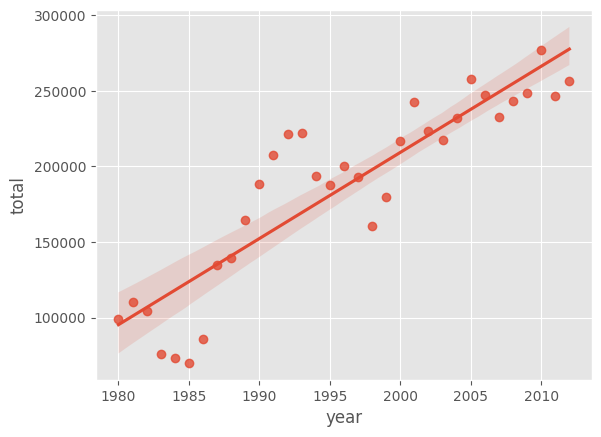

In [121]:
sns.regplot(x = "year" , y = "total" , data = df_tot)

<Axes: xlabel='total', ylabel='year'>

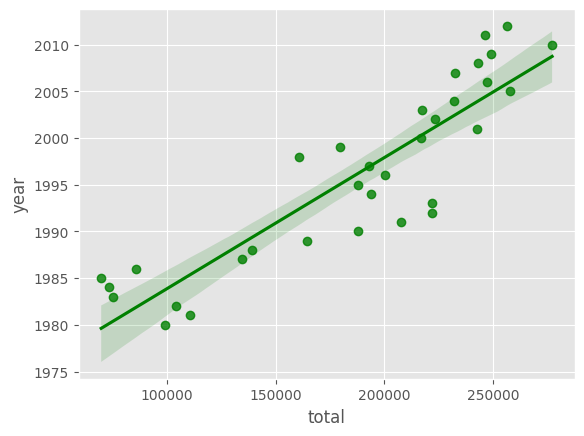

In [127]:
sns.regplot(x = "total" , y = "year" , data = df_tot , color = "green")

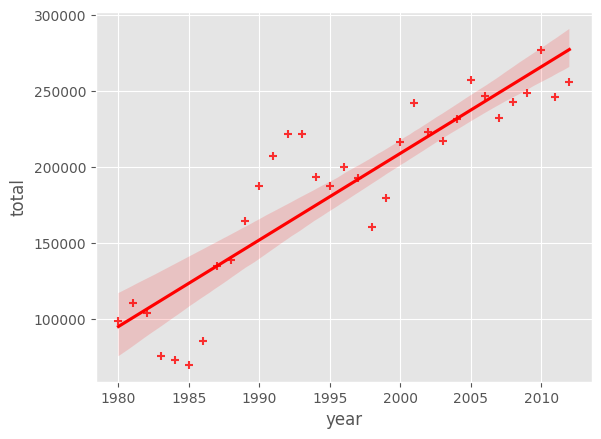

In [131]:
ax = sns.regplot(x = "year" , y = "total" , data = df_tot , color = "r" , marker = "+" )
plt.show()

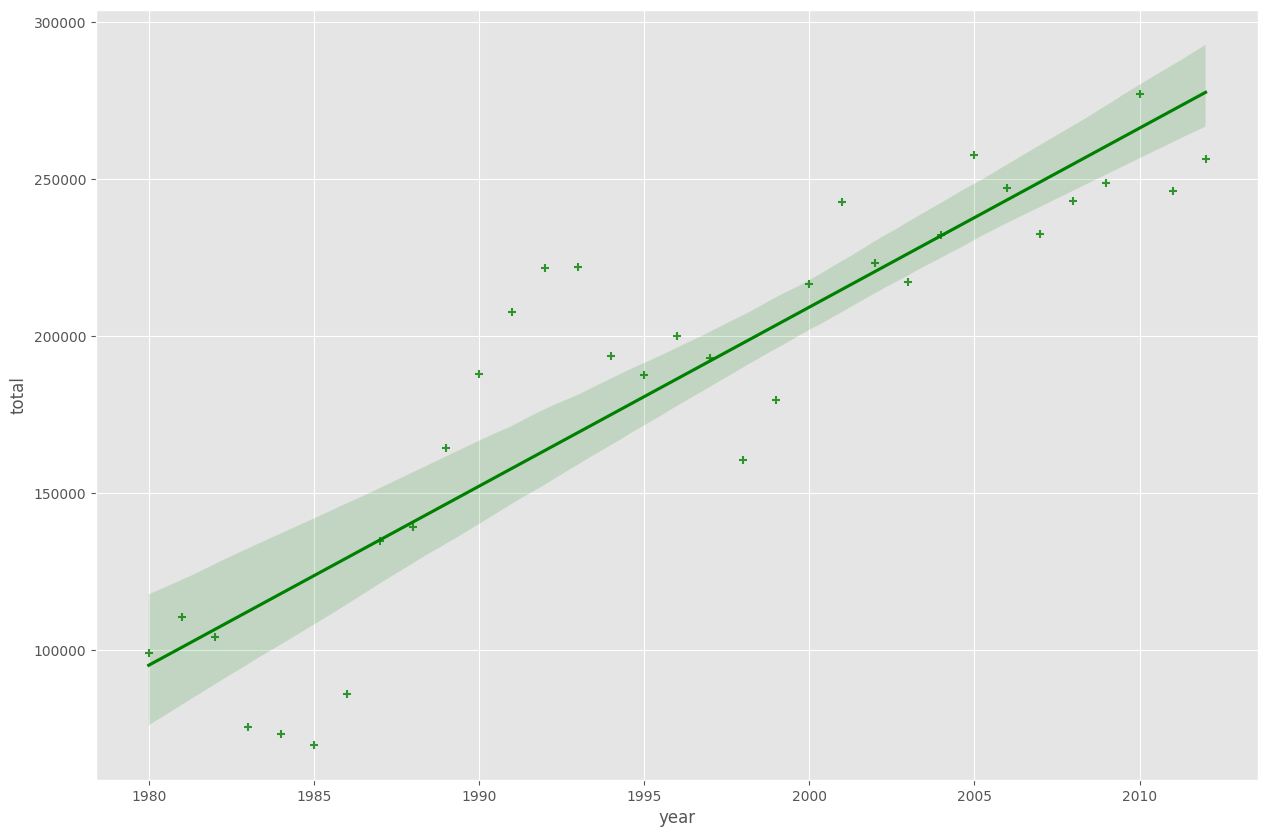

In [133]:
plt.figure(figsize=(15, 10))
sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')
plt.show()

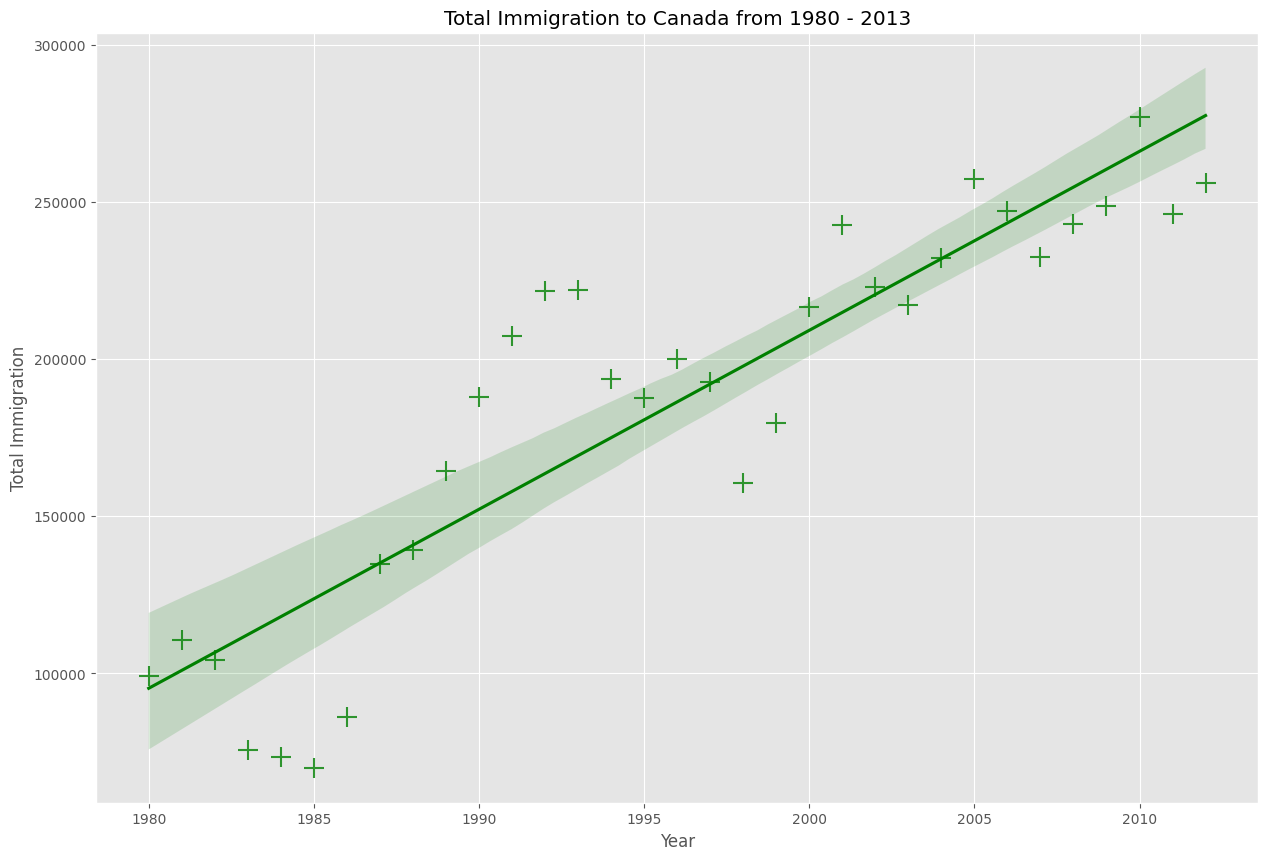

In [135]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title
plt.show()

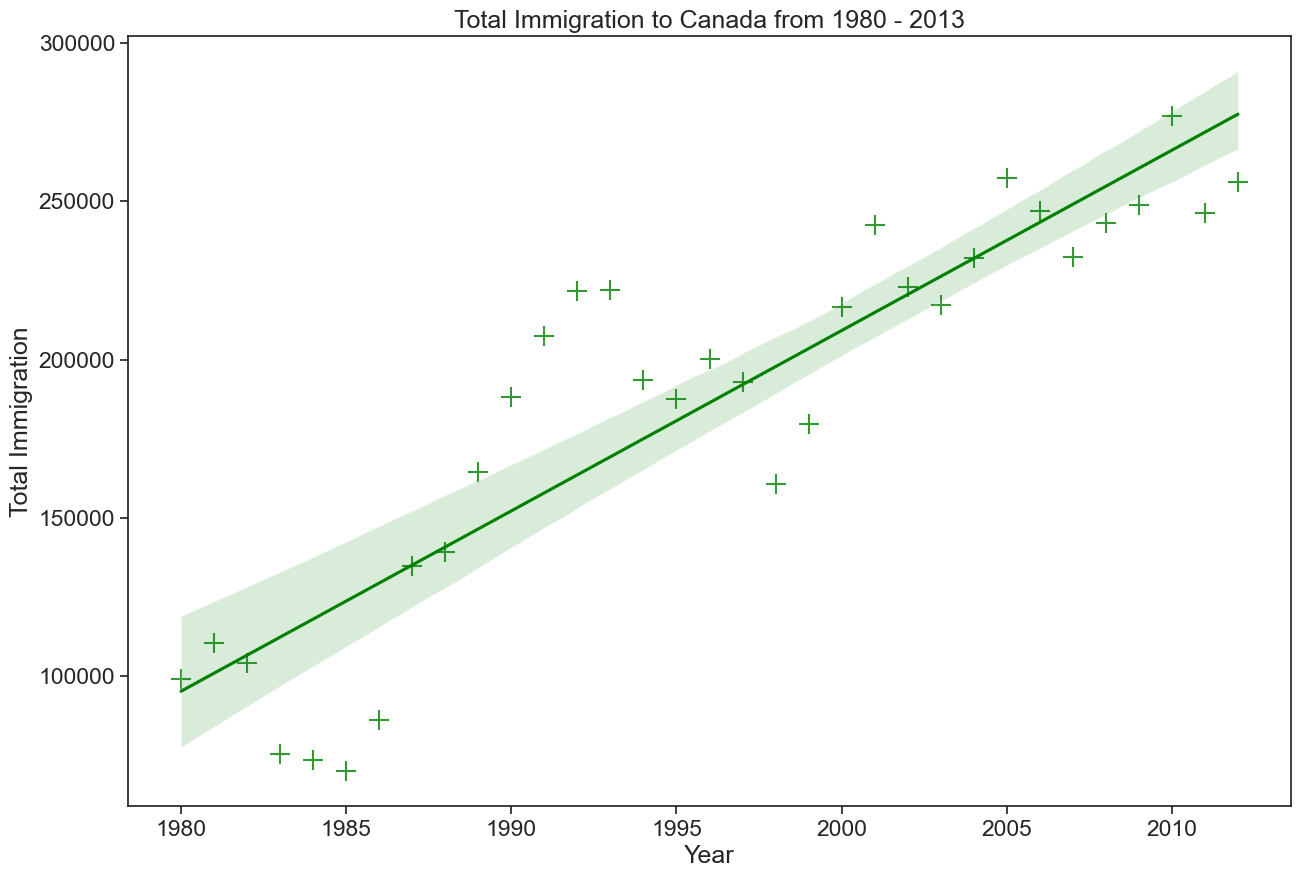

In [137]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks')  # Arka plan için 

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

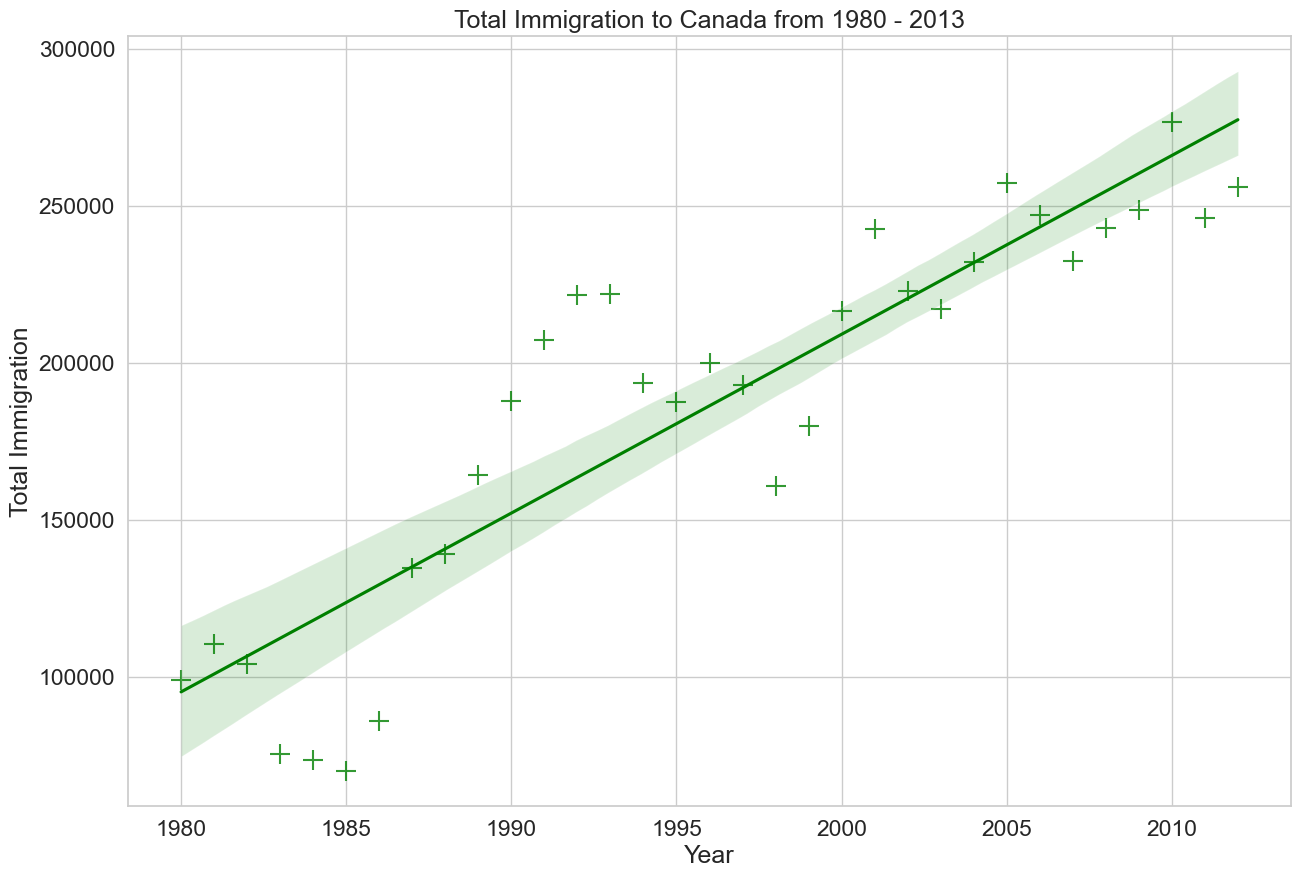

In [139]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

In [143]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [237]:
df_countries = df_can.loc[["Denmark","Sweden","Norway"] , years].T
df_countries.head()

Country,Denmark,Sweden,Norway
1980,272,281,116
1981,293,308,77
1982,299,222,106
1983,106,176,51
1984,93,128,31


In [251]:
df_total = pd.DataFrame(df_countries.sum(axis = 1))
df_total.head()

,0
1980,669
1981,678
1982,627
1983,333
1984,252


In [267]:
df_total.reset_index(inplace = True)
df_total.head()

,index,years,Total
0,0,1980,669
1,1,1981,678
2,2,1982,627
3,3,1983,333
4,4,1984,252


In [255]:
df_total.columns = ["years" , "Total"]

In [259]:
df_total["years"] = df_total["years"].astype(int)

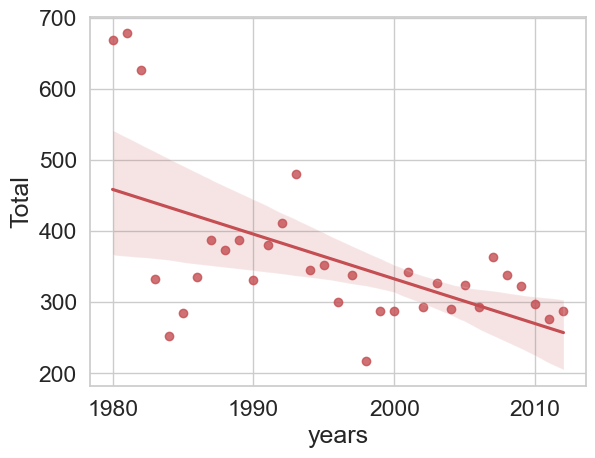

In [269]:
ax = sns.regplot(
    x = "years",
    y = "Total",
    data = df_total, 
    color = "r"
)

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U7'), dtype('float64')) -> None

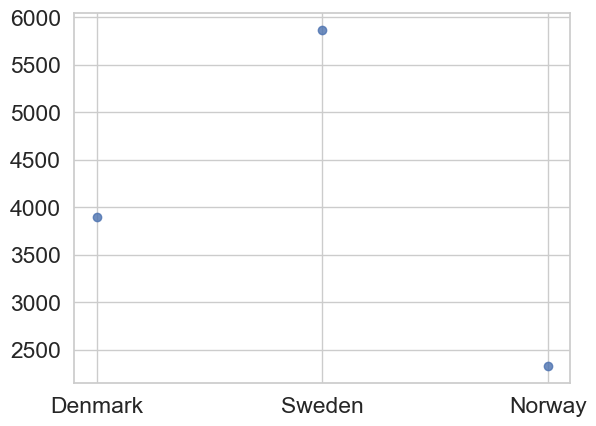

In [229]:
sns.regplot(x = "Country" , y = "Total", data = df_fin)